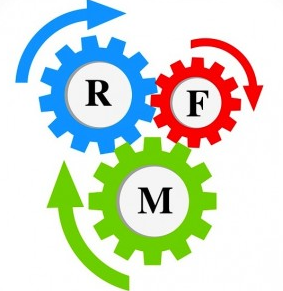

RFM: Müşteri segmentasyonunda kullanılan bir yöntemdir; şirket için hangi müşteriler çok daha önemli, hangi müşteriler kaybedilebilir, hangi müşteriler kaybedilmemeli gibi birçok sorunun cevabını içinde barındırır.
3 tane parametresi vardır.
Recency:Müşterinin aktif müşteri olup olmadığı bu parametre ile belli olur.Müşteri en son kaç gün önce sipariş vermişin cevabıdır.
Frequency:Müşterinin toplam sipariş sayısını verir.
Monetary:Müşterinin şirkete sağladığı getiridir,parasal değerdir.

1. Veriyi Tanıma

In [ ]:
import pandas as pd
import datetime as dt

In [ ]:
data=pd.read_csv("../input/ecommerce-data/data.csv")

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

In [ ]:
data["TotalPrice"]=data["UnitPrice"]*data["Quantity"]

In [ ]:
data.head()

In [ ]:
data["UnitPrice"].describe()

2. İade edilen ürünler var ve fatura numaraları c ile başladığı biliniyor, bu verilerden kurtuluyoruz!

In [ ]:
data=data[~data["InvoiceNo"].str.contains("C", na=False)]

In [ ]:
data["Quantity"].describe()

In [ ]:
data.info()

In [ ]:
data["InvoiceDate"].head()

3. Tarih ve saat bilgisi birlikte verilmiş,yalnızca tarih bilgisine ihtiyacım var bölüyoruz!

In [ ]:
data["InvoiceDate"].index

In [ ]:
Date=[]
for i in data["InvoiceDate"].index:
    a,b=data["InvoiceDate"][i].split()
    Date.append(a)
    

In [ ]:
Date[:5]

In [ ]:
len(Date)

4. Tarihler object tipinde görünüyor,tipine datetime'a çeviriyoruz!

In [ ]:
Date=[d.date() for d in pd.to_datetime(Date)]

In [ ]:
data["Date"]=Date

In [ ]:
data.head()

5. RFM hesaplamaları için gerekli düzenlemeleri yapıyoruz

In [ ]:
data["Date"].max()


In [ ]:
today_date = dt.date(2011, 12, 11)
today_date

In [ ]:
rfm.head()

In [ ]:
rfm.columns=["Recency","Frequency","Monetary"]

In [ ]:
rfm.head()

In [ ]:
rfm["Monetary"].describe()

In [ ]:
rfm["RF_SCORE"]=[str(i[0])+str(i[1]) for i in rfm[["recency_score","frequency_score"]].values]
rfm.tail()

In [ ]:
rfm.head()

In [ ]:
rfm.groupby("segment")[["Monetary"]].mean().sort_values(by="Monetary",ascending=False).head(3)

In [ ]:
rfm1=rfm[rfm["segment"]=='cant_loose'].reset_index()

In [ ]:
rfm1.head()

In [ ]:
rfm1.describe()

6. Veriden çıkarım zamanı,öneri vakti!

Öneri: Bu grubun recency'si yüksek olduğundan indirim kuponu verip alışveriş yapmalarını sağlayabiliriz.10 ve 10'un katı siparişlerinizde indirim kuponu verilecek gibi bir kampanya söz konusu olabilir.Böylelikle frequency'leri artmış recency'leri azalmış olacak.

Frequency'si 10'dan küçükse 10.siparişte 20'den küçükse 20.siparişte .... indirim yapılacaktır. Ayrıca bu grupta frekansı en yüksek olan kişinin 34 tane siparişi olduğundan indirimi en son 40.siparişe göre kadar ayarladım.
Bu grubun getirisi çok daha yüksek, churn olmamaları için güzel bir kampanya olabilir.

In [ ]:
rfm1["rate of discount"]=pd.cut(rfm1["Frequency"], bins=[0,10,20,30,40],labels=[10,20,30,40])

In [ ]:
rfm1.tail()

Rfm analizi de bu şekildeydi,Görüşmek üzere :)